In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)



In [2]:
data = pd.read_csv('learningSet.csv')

/var/folders/sj/1qv6957x2s555m3bsv0gz82c0000gn/T/ipykernel_93769/3673836359.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('learningSet.csv')


In [3]:
print(data.shape)
data.head()

(95412, 481)


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.

## Checking the Nan values of the dataset

In [4]:
data.isna().sum()/len(data)

ODATEDW     0.000000
OSOURCE     0.000000
TCODE       0.000000
STATE       0.000000
ZIP         0.000000
              ...   
MDMAUD_R    0.000000
MDMAUD_F    0.000000
MDMAUD_A    0.000000
CLUSTER2    0.001383
GEOCODE2    0.001383
Length: 481, dtype: float64

In [5]:
data['OSOURCE'].value_counts()

MBC    4539
SYN    3563
AML    3430
BHG    3324
IMP    2986
       ... 
MDD       1
NRM       1
HDP       1
CRP       1
VIC       1
Name: OSOURCE, Length: 896, dtype: int64

In [6]:
data['ZIP'].value_counts()

85351     61
92653     59
85710     54
95608     50
60619     45
          ..
70058-     1
93024      1
96306      1
30060-     1
32776-     1
Name: ZIP, Length: 19938, dtype: int64

## Creating a new df  to check the null percentages

In [7]:
nulls_percent_df = pd.DataFrame(data.isna().sum()*100/len(data)).reset_index()
nulls_percent_df
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,OSOURCE,0.000000
2,TCODE,0.000000
3,STATE,0.000000
4,ZIP,0.000000
...,...,...
476,MDMAUD_R,0.000000
477,MDMAUD_F,0.000000
478,MDMAUD_A,0.000000
479,CLUSTER2,0.138347


In [8]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0]

,column_name,nulls_percentage
16,AGE,24.802960
23,NUMCHLD,87.018404
24,INCOME,22.309563
26,WEALTH1,46.882992
28,MBCRAFT,55.395548
...,...,...
455,RAMNT_24,81.409047
466,NEXTDATE,10.452564
467,TIMELAG,10.452564
479,CLUSTER2,0.138347


In [9]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0].head(60)

,column_name,nulls_percentage
16,AGE,24.802960
23,NUMCHLD,87.018404
24,INCOME,22.309563
26,WEALTH1,46.882992
28,MBCRAFT,55.395548
29,MBGARDEN,55.395548
30,MBBOOKS,55.395548
31,MBCOLECT,55.458433
32,MAGFAML,55.395548
33,MAGFEM,55.395548


In [10]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0].tail(32)

,column_name,nulls_percentage
428,RDATE_19,83.359535
429,RDATE_20,91.732696
430,RDATE_21,90.029556
431,RDATE_22,78.123297
432,RDATE_23,91.763091
433,RDATE_24,81.409047
434,RAMNT_3,99.746363
435,RAMNT_4,99.705488
436,RAMNT_5,99.990567
437,RAMNT_6,99.186685


## Checking the columns above 85 percent of Nan values

In [11]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>85]
columns_above_threshold['column_name']

23      NUMCHLD
412     RDATE_3
413     RDATE_4
414     RDATE_5
415     RDATE_6
416     RDATE_7
419    RDATE_10
422    RDATE_13
424    RDATE_15
426    RDATE_17
429    RDATE_20
430    RDATE_21
432    RDATE_23
434     RAMNT_3
435     RAMNT_4
436     RAMNT_5
437     RAMNT_6
438     RAMNT_7
441    RAMNT_10
444    RAMNT_13
446    RAMNT_15
448    RAMNT_17
451    RAMNT_20
452    RAMNT_21
454    RAMNT_23
Name: column_name, dtype: object

## Assigning columns to the drop list

In [12]:
drop_columns_list = list(columns_above_threshold['column_name'])
print(drop_columns_list)

['NUMCHLD', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_10', 'RDATE_13', 'RDATE_15', 'RDATE_17', 'RDATE_20', 'RDATE_21', 'RDATE_23', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_10', 'RAMNT_13', 'RAMNT_15', 'RAMNT_17', 'RAMNT_20', 'RAMNT_21', 'RAMNT_23']


### Forgot to add the two columns to the drop list before so doing it here.

In [13]:
drop_list = ['OSOURCE', 'ZIP']
drop_list

['OSOURCE', 'ZIP']

### Making a new dataframe with the new data after dropping the columns.

In [14]:
new_data = data.drop(columns=drop_columns_list)

In [15]:
new_data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_8,RDATE_9,RDATE_11,RDATE_12,RDATE_14,RDATE_16,RDATE_18,RDATE_19,RDATE_22,RDATE_24,RAMNT_8,RAMNT_9,RAMNT_11,RAMNT_12,RAMNT_14,RAMNT_16,RAMNT_18,RAMNT_19,RAMNT_22,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9508.0,9507.0,9506.0,9504.0,9503.0,9502.0,9501.0,9411.0,9411.0,9410.0,9409.0,9407.0,9406.0,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E

### Splitting into categorical data.

In [16]:
categorical = new_data.select_dtypes(object)
categorical.head()

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,,,0,,,,,XXXX,T2,36,,,,,,,F,,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,,,0,,,,,XXXX,S1,14,E,H,,,,M,M,3,,,,2,,,,,,,,,,,,,,,,,,,,,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,,,,L1E,,,N1E,N1E,N1E,N1E,,F1E,L,G,X,X,X,A
2,AMH,NC,27017,,,0,,,,,XXXX,R2,43,,U,,,,,M,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,,S4F,S4F,S4F,S4F,S4F,S4F,,S4D,S4D,,,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,,,0,,,,,XXXX,R2,44,E,U,,,,,F,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,,,L,E,X,X,X,C
4,,FL,33176,,,0,X,X,,,XXXX,S2,16,E,H,,,,,F,3,,12,,,,,Y,Y,,,,Y,,,Y,,Y,,Y,,Y,,3,,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D,L,F,X,X,X,A


### Dealing with the Gender column.

In [17]:
categorical['GENDER'].value_counts(dropna=False)

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [18]:
categorical['GENDER'].unique()

array(['F', 'M', ' ', 'C', 'U', 'J', 'A'], dtype=object)

In [19]:
categorical['GENDER'] = categorical['GENDER'].str.strip().replace('', 'F')


In [20]:
categorical['GENDER'].value_counts()

F    54234
M    39094
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [21]:
categorical['GENDER'] = categorical['GENDER'].replace(['J', 'C', 'A','U'], 'others')

In [22]:
categorical['GENDER'].value_counts()

F         54234
M         39094
others     2084
Name: GENDER, dtype: int64

In [23]:
categorical.head()

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,,,0,,,,,XXXX,T2,36,,,,,,,F,,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,,,0,,,,,XXXX,S1,14,E,H,,,,M,M,3,,,,2,,,,,,,,,,,,,,,,,,,,,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,,,,L1E,,,N1E,N1E,N1E,N1E,,F1E,L,G,X,X,X,A
2,AMH,NC,27017,,,0,,,,,XXXX,R2,43,,U,,,,,M,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,,S4F,S4F,S4F,S4F,S4F,S4F,,S4D,S4D,,,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,,,0,,,,,XXXX,R2,44,E,U,,,,,F,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,,,L,E,X,X,X,C
4,,FL,33176,,,0,X,X,,,XXXX,S2,16,E,H,,,,,F,3,,12,,,,,Y,Y,,,,Y,,,Y,,Y,,Y,,Y,,3,,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D,L,F,X,X,X,A


# Here starts Lab- Feature engineering

In [141]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)



### Splitting into numerical data.

In [25]:
numerical = new_data.select_dtypes(np.number)

In [26]:
print(numerical.shape)
numerical.head()

(95412, 382)


,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_8,RDATE_9,RDATE_11,RDATE_12,RDATE_14,RDATE_16,RDATE_18,RDATE_19,RDATE_22,RDATE_24,RAMNT_8,RAMNT_9,RAMNT_11,RAMNT_12,RAMNT_14,RAMNT_16,RAMNT_18,RAMNT_19,RAMNT_22,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9508.0,9507.0,9506.0,9504.0,9503.0,9502.0,9501.0,9411.0,9411.0,9410.0,9409.0,9407.0,9406.0,27,9702,74,6,14,NaN,NaN,NaN,NaN,9507.0,9505.0,NaN,NaN,NaN,9406.0,NaN,NaN,NaN,NaN,10.0,11.0,NaN,NaN,NaN,9.0,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,

### Checking the Nan values of the numerical columns.

In [27]:
#print(numerical.isna().sum())

### Dealing with the Geocode2 column.

In [28]:
categorical['GEOCODE2'].value_counts(dropna=False)

A      34484
B      28505
D      16580
C      15524
         187
NaN      132
Name: GEOCODE2, dtype: int64

In [29]:
categorical['GEOCODE2'].unique()

array(['C', 'A', 'D', 'B', ' ', nan], dtype=object)

In [30]:
categorical['GEOCODE2'] = categorical['GEOCODE2'].fillna('A')

In [31]:
categorical['GEOCODE2'] = categorical['GEOCODE2'].replace(' ', 'A')

In [32]:
categorical['GEOCODE2'].value_counts(dropna=False)

A    34803
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64

### Dealing with Wealth1 column.

In [33]:
numerical['WEALTH1'].value_counts(dropna=False)

NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

/Users/maja/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


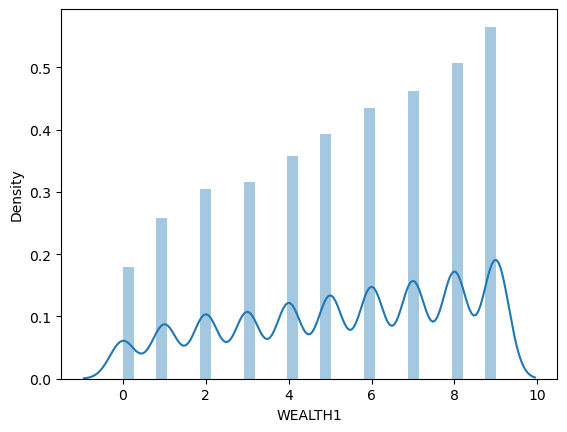

In [34]:
sns.distplot(numerical['WEALTH1']) 
plt.show()

In [35]:
numerical['WEALTH1'].median()

6.0

In [36]:
numerical['WEALTH1'] = numerical['WEALTH1'].fillna(6.0)

/Users/maja/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


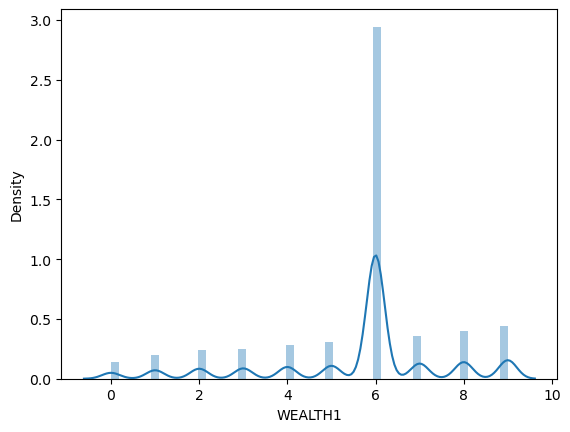

In [37]:
sns.distplot(numerical['WEALTH1']) 
plt.show()

### Dealing with ADI column.

In [38]:
#numerical['ADI'].value_counts(dropna=False)

In [39]:
len(numerical['ADI'].unique())

205

In [40]:
numerical['ADI'] = numerical['ADI'].fillna(13.0)

In [41]:
#numerical['ADI'].value_counts(dropna=False)

In [42]:
numerical['ADI'].isna().sum()

0

### Dealing with the DMA column.

In [43]:
#numerical['DMA'].value_counts(dropna=False)

/Users/maja/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


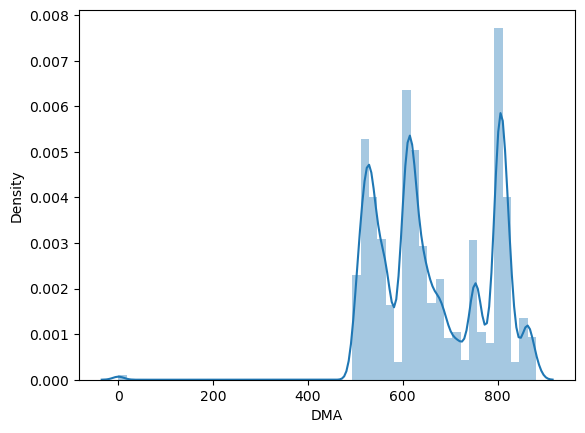

In [44]:
sns.distplot(numerical['DMA']) 
plt.show()

In [45]:
numerical['DMA'] = numerical['DMA'].fillna(803.0)

### Dealing with MSA column.

In [46]:
#numerical['MSA'].value_counts(dropna=False)

In [47]:
numerical['MSA'] = numerical['MSA'].fillna(0.0)

## Lab | Handling Data Imbalance in Classification Models starts here

In [48]:
display(numerical.shape)
numerical.dtypes

(95412, 382)

ODATEDW       int64
TCODE         int64
DOB           int64
AGE         float64
INCOME      float64
WEALTH1     float64
HIT           int64
MBCRAFT     float64
MBGARDEN    float64
MBBOOKS     float64
MBCOLECT    float64
MAGFAML     float64
MAGFEM      float64
MAGMALE     float64
PUBGARDN    float64
PUBCULIN    float64
PUBHLTH     float64
PUBDOITY    float64
PUBNEWFN    float64
PUBPHOTO    float64
PUBOPP      float64
MALEMILI      int64
MALEVET       int64
VIETVETS      int64
WWIIVETS      int64
LOCALGOV      int64
STATEGOV      int64
FEDGOV        int64
WEALTH2     float64
POP901        int64
POP902        int64
POP903        int64
POP90C1       int64
POP90C2       int64
POP90C3       int64
POP90C4       int64
POP90C5       int64
ETH1          int64
ETH2          int64
ETH3          int64
ETH4          int64
ETH5          int64
ETH6          int64
ETH7          int64
ETH8          int64
ETH9          int64
ETH10         int64
ETH11         int64
ETH12         int64
ETH13         int64


In [49]:
numerical['MSA'] = numerical['MSA'].astype(float)
numerical['ADI'] = numerical['ADI'].astype(float)
numerical['DMA'] = numerical['DMA'].astype(float)


In [50]:
numerical['TARGET_B'] = numerical['TARGET_B'].astype('object')

In [51]:
display(categorical.shape)
categorical.dtypes

(95412, 74)

OSOURCE     object
STATE       object
ZIP         object
MAILCODE    object
PVASTATE    object
NOEXCH      object
RECINHSE    object
RECP3       object
RECPGVG     object
RECSWEEP    object
MDMAUD      object
DOMAIN      object
CLUSTER     object
AGEFLAG     object
HOMEOWNR    object
CHILD03     object
CHILD07     object
CHILD12     object
CHILD18     object
GENDER      object
DATASRCE    object
SOLP3       object
SOLIH       object
MAJOR       object
GEOCODE     object
COLLECT1    object
VETERANS    object
BIBLE       object
CATLG       object
HOMEE       object
PETS        object
CDPLAY      object
STEREO      object
PCOWNERS    object
PHOTO       object
CRAFTS      object
FISHER      object
GARDENIN    object
BOATS       object
WALKER      object
KIDSTUFF    object
CARDS       object
PLATES      object
LIFESRC     object
PEPSTRFL    object
RFA_2       object
RFA_3       object
RFA_4       object
RFA_5       object
RFA_6       object
RFA_7       object
RFA_8       object
RFA_9       

### I figured that I did not do much cleaning on Monday lab, so I am doing the entire cleaning here

In [52]:
nan_counts = numerical.isna().sum()
nan_counts = nan_counts[nan_counts > 0]
#pd.set_option('display.max_rows', 100)
pd.set_option('display.max_rows', 100)
nan_counts

AGE         23665
INCOME      21286
MBCRAFT     52854
MBGARDEN    52854
MBBOOKS     52854
MBCOLECT    52914
MAGFAML     52854
MAGFEM      52854
MAGMALE     52854
PUBGARDN    52854
PUBCULIN    52854
PUBHLTH     52854
PUBDOITY    52854
PUBNEWFN    52854
PUBPHOTO    52854
PUBOPP      52854
WEALTH2     43823
ADATE_3      1950
ADATE_4      2191
ADATE_5     33590
ADATE_6      3557
ADATE_7      8874
ADATE_8      3511
ADATE_9     11245
ADATE_10    32748
ADATE_11    10422
ADATE_12     8923
ADATE_13    40219
ADATE_14    18867
ADATE_15    65477
ADATE_16    20364
ADATE_17    27650
ADATE_18    21263
ADATE_19    24480
ADATE_20    50200
ADATE_21    35212
ADATE_22    25648
ADATE_23    56270
ADATE_24    36973
RDATE_8     73940
RDATE_9     78678
RDATE_11    80672
RDATE_12    69712
RDATE_14    72095
RDATE_16    68418
RDATE_18    75634
RDATE_19    79535
RDATE_22    74539
RDATE_24    77674
RAMNT_8     73940
RAMNT_9     78678
RAMNT_11    80672
RAMNT_12    69712
RAMNT_14    72095
RAMNT_16    68418
RAMNT_18  

In [53]:
drop_list = []

In [54]:
col_to_drop = ["ADATE", "RDATE", "RAMNT", "NUMCHILD","MB","MAG", "PUB"]


In [55]:
for col in numerical.columns:
    # check if any value in col_to_drop is a substring of the column name
    if any(val in col for val in col_to_drop):
        # if a match is found, append the column name to drop_list
        drop_list.append(col)

In [56]:
drop_list

['MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'ADATE_2',
 'ADATE_3',
 'ADATE_4',
 'ADATE_5',
 'ADATE_6',
 'ADATE_7',
 'ADATE_8',
 'ADATE_9',
 'ADATE_10',
 'ADATE_11',
 'ADATE_12',
 'ADATE_13',
 'ADATE_14',
 'ADATE_15',
 'ADATE_16',
 'ADATE_17',
 'ADATE_18',
 'ADATE_19',
 'ADATE_20',
 'ADATE_21',
 'ADATE_22',
 'ADATE_23',
 'ADATE_24',
 'MAXADATE',
 'RDATE_8',
 'RDATE_9',
 'RDATE_11',
 'RDATE_12',
 'RDATE_14',
 'RDATE_16',
 'RDATE_18',
 'RDATE_19',
 'RDATE_22',
 'RDATE_24',
 'RAMNT_8',
 'RAMNT_9',
 'RAMNT_11',
 'RAMNT_12',
 'RAMNT_14',
 'RAMNT_16',
 'RAMNT_18',
 'RAMNT_19',
 'RAMNT_22',
 'RAMNT_24',
 'RAMNTALL',
 'MINRAMNT',
 'MINRDATE',
 'MAXRAMNT',
 'MAXRDATE']

In [57]:
len(drop_list)

63

In [58]:
numerical = numerical.drop(columns=drop_list)
numerical

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,NGIFTALL,CARDGIFT,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,6.0,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,31,14,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,3,1,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,3.0,1.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,20,19,24,18,16,2,0,0,1,28,8,31,11,38,62,8,74,22,0,0,0,0,0,2,2,1,21,19,24,6,6

In [59]:
numerical['AGE'] = numerical["AGE"].fillna(np.mean(numerical['AGE']))
numerical['INCOME'] = numerical['INCOME'].fillna(5.0)
numerical['CLUSTER2'] = numerical['CLUSTER2'].fillna(np.ceil(np.mean(numerical['CLUSTER2'])))

In [60]:
numerical['WEALTH2'] = numerical['WEALTH2'].astype('object')
numerical['WEALTH2'] = numerical['WEALTH2'].fillna('5.0')

In [61]:
numerical['TIMELAG'].median()

6.0

In [62]:
numerical['TIMELAG'] = numerical['TIMELAG'].fillna(6.0)

In [63]:
numerical['NEXTDATE'] = numerical['NEXTDATE'].fillna(0)


In [64]:
print(numerical.isna().sum())
pd.set_option('display.max_rows', None)


ODATEDW     0
TCODE       0
DOB         0
AGE         0
INCOME      0
           ..
TARGET_B    0
TARGET_D    0
HPHONE_D    0
RFA_2F      0
CLUSTER2    0
Length: 319, dtype: int64


### Now that I am done with my numerical data, I proceed with cleaning my categorical data.

In [65]:
categorical.isna().sum()

OSOURCE     0
STATE       0
ZIP         0
MAILCODE    0
PVASTATE    0
NOEXCH      0
RECINHSE    0
RECP3       0
RECPGVG     0
RECSWEEP    0
MDMAUD      0
DOMAIN      0
CLUSTER     0
AGEFLAG     0
HOMEOWNR    0
CHILD03     0
CHILD07     0
CHILD12     0
CHILD18     0
GENDER      0
DATASRCE    0
SOLP3       0
SOLIH       0
MAJOR       0
GEOCODE     0
COLLECT1    0
VETERANS    0
BIBLE       0
CATLG       0
HOMEE       0
PETS        0
CDPLAY      0
STEREO      0
PCOWNERS    0
PHOTO       0
CRAFTS      0
FISHER      0
GARDENIN    0
BOATS       0
WALKER      0
KIDSTUFF    0
CARDS       0
PLATES      0
LIFESRC     0
PEPSTRFL    0
RFA_2       0
RFA_3       0
RFA_4       0
RFA_5       0
RFA_6       0
RFA_7       0
RFA_8       0
RFA_9       0
RFA_10      0
RFA_11      0
RFA_12      0
RFA_13      0
RFA_14      0
RFA_15      0
RFA_16      0
RFA_17      0
RFA_18      0
RFA_19      0
RFA_20      0
RFA_21      0
RFA_22      0
RFA_23      0
RFA_24      0
RFA_2R      0
RFA_2A      0
MDMAUD_R    0
MDMAUD

In [66]:
categorical = categorical.apply(lambda x: x.replace(" ", np.NaN))

In [67]:
categorical.isna().sum()

OSOURCE       928
STATE           0
ZIP             0
MAILCODE    94013
PVASTATE    93954
NOEXCH          7
RECINHSE    88709
RECP3       93395
RECPGVG     95298
RECSWEEP    93795
MDMAUD          0
DOMAIN       2316
CLUSTER      2316
AGEFLAG     29548
HOMEOWNR    22228
CHILD03     94266
CHILD07     93846
CHILD12     93601
CHILD18     92565
GENDER          0
DATASRCE    21280
SOLP3       95232
SOLIH       89212
MAJOR       95118
GEOCODE     80168
COLLECT1    90210
VETERANS    84986
BIBLE       86541
CATLG       87547
HOMEE       94525
PETS        81086
CDPLAY      83158
STEREO      82618
PCOWNERS    84931
PHOTO       90626
CRAFTS      87236
FISHER      88282
GARDENIN    82010
BOATS       93384
WALKER      84911
KIDSTUFF    93876
CARDS       94371
PLATES      94852
LIFESRC     54032
PEPSTRFL    50143
RFA_2           0
RFA_3        1950
RFA_4        2312
RFA_5       33590
RFA_6        3557
RFA_7        8874
RFA_8        3511
RFA_9       11245
RFA_10      32748
RFA_11      10422
RFA_12    

### Filtering out the columns to deal with the NaNs

In [68]:
nulls_percent_cat = pd.DataFrame(categorical.isna().sum()*100/len(data)).reset_index()
#nulls_percent_cat
nulls_percent_cat.columns = ['column_name', 'nulls_percentage']
#nulls_percent_cat

In [69]:
nulls_percent_cat[nulls_percent_cat['nulls_percentage']!=0]

,column_name,nulls_percentage
0,OSOURCE,0.972624
3,MAILCODE,98.533727
4,PVASTATE,98.471890
5,NOEXCH,0.007337
6,RECINHSE,92.974678
7,RECP3,97.886010
8,RECPGVG,99.880518
9,RECSWEEP,98.305245
11,DOMAIN,2.427368
12,CLUSTER,2.427368


### Making a threshold to filter out the columns

In [70]:
columns_above_threshold1 = nulls_percent_cat[nulls_percent_cat['nulls_percentage']>85]
columns_above_threshold1['column_name']

3     MAILCODE
4     PVASTATE
6     RECINHSE
7        RECP3
8      RECPGVG
9     RECSWEEP
15     CHILD03
16     CHILD07
17     CHILD12
18     CHILD18
21       SOLP3
22       SOLIH
23       MAJOR
25    COLLECT1
26    VETERANS
27       BIBLE
28       CATLG
29       HOMEE
31      CDPLAY
32      STEREO
33    PCOWNERS
34       PHOTO
35      CRAFTS
36      FISHER
37    GARDENIN
38       BOATS
39      WALKER
40    KIDSTUFF
41       CARDS
42      PLATES
Name: column_name, dtype: object

In [71]:
drop_columns_cat = list(columns_above_threshold1['column_name'])
print(drop_columns_cat)

['MAILCODE', 'PVASTATE', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'SOLP3', 'SOLIH', 'MAJOR', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES']


In [72]:
categorical = categorical.drop(columns = drop_columns_cat,axis=1)

In [73]:
categorical = categorical.drop(columns =['OSOURCE','ZIP'],axis=1)

In [74]:
categorical.shape

(95412, 42)

In [75]:
categorical.head()

,STATE,NOEXCH,MDMAUD,DOMAIN,CLUSTER,AGEFLAG,HOMEOWNR,GENDER,DATASRCE,GEOCODE,PETS,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,IL,0,XXXX,T2,36,NaN,NaN,F,NaN,NaN,NaN,NaN,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,CA,0,XXXX,S1,14,E,H,M,3,2,NaN,NaN,NaN,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,NaN,NaN,NaN,L1E,NaN,NaN,N1E,N1E,N1E,N1E,NaN,F1E,L,G,X,X,X,A
2,NC,0,XXXX,R2,43,NaN,U,M,3,NaN,NaN,NaN,X,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,NaN,S4F,S4F,S4F,S4F,S4F,S4F,NaN,S4D,S4D,NaN,NaN,S4D,S4D,S3D,L,E,X,X,X,C
3,CA,0,XXXX,R2,44,E,U,F,3,NaN,NaN,NaN,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,NaN,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,NaN,NaN,L,E,X,X,X,C
4,FL,0,XXXX,S2,16,E,H,F,3,NaN,NaN,3,NaN,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,NaN,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D,L,F,X,X,X,A


### I dropped columns with high NaN values and now I am going to deal with the other columns.

In [76]:
categorical.isna().sum()

STATE           0
NOEXCH          7
MDMAUD          0
DOMAIN       2316
CLUSTER      2316
AGEFLAG     29548
HOMEOWNR    22228
GENDER          0
DATASRCE    21280
GEOCODE     80168
PETS        81086
LIFESRC     54032
PEPSTRFL    50143
RFA_2           0
RFA_3        1950
RFA_4        2312
RFA_5       33590
RFA_6        3557
RFA_7        8874
RFA_8        3511
RFA_9       11245
RFA_10      32748
RFA_11      10422
RFA_12       8923
RFA_13      40219
RFA_14      18867
RFA_15      65477
RFA_16      20417
RFA_17      27650
RFA_18      21263
RFA_19      24492
RFA_20      50200
RFA_21      35212
RFA_22      25648
RFA_23      56274
RFA_24      36973
RFA_2R          0
RFA_2A          0
MDMAUD_R        0
MDMAUD_F        0
MDMAUD_A        0
GEOCODE2        0
dtype: int64

In [77]:
categorical.NOEXCH.value_counts(dropna=False)

0      61203
0      33882
1        195
1         90
X         35
NaN        7
Name: NOEXCH, dtype: int64

In [78]:
categorical['DOMAIN'].value_counts(dropna=False)

R2     13623
T2     12369
S1     11503
S2      8530
C2      8264
C1      6145
C3      5280
T1      4982
R3      4809
U1      4510
U2      3254
U3      2598
NaN     2316
T3      2176
S3      1891
U4      1804
R1      1358
Name: DOMAIN, dtype: int64

In [79]:
categorical['DOMAIN'] = categorical['DOMAIN'].fillna('R2')

In [80]:
categorical['DOMAIN_A'] = list(map(lambda x: x[0], categorical['DOMAIN']))
categorical['DOMAIN_B'] = list(map(lambda x: x[1], categorical['DOMAIN']))

In [81]:
categorical = categorical.drop(columns=['DOMAIN'])

In [82]:
categorical.head()

,STATE,NOEXCH,MDMAUD,CLUSTER,AGEFLAG,HOMEOWNR,GENDER,DATASRCE,GEOCODE,PETS,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,0,XXXX,36,NaN,NaN,F,NaN,NaN,NaN,NaN,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C,T,2
1,CA,0,XXXX,14,E,H,M,3,2,NaN,NaN,NaN,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,NaN,NaN,NaN,L1E,NaN,NaN,N1E,N1E,N1E,N1E,NaN,F1E,L,G,X,X,X,A,S,1
2,NC,0,XXXX,43,NaN,U,M,3,NaN,NaN,NaN,X,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,NaN,S4F,S4F,S4F,S4F,S4F,S4F,NaN,S4D,S4D,NaN,NaN,S4D,S4D,S3D,L,E,X,X,X,C,R,2
3,CA,0,XXXX,44,E,U,F,3,NaN,NaN,NaN,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,NaN,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,NaN,NaN,L,E,X,X,X,C,R,2
4,FL,0,XXXX,16,E,H,F,3,NaN,NaN,3,NaN,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,NaN,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D,L,F,X,X,X,A,S,2


In [83]:
drop_list=[]

In [84]:
drop_list.append('NOEXCH')

In [85]:
drop_list.append('MDMAUD')

In [86]:
drop_list = drop_list + (['MDMAUD_R','MDMAUD_F','MDMAUD_A'])

In [87]:
categorical['HOMEOWNR'].value_counts(dropna=False)

H      52354
NaN    22228
U      20830
Name: HOMEOWNR, dtype: int64

In [88]:
categorical['HOMEOWNR'] = categorical['HOMEOWNR'].fillna('U') 

In [89]:
categorical['DATASRCE'].value_counts(dropna=False)

3      43549
2      23455
NaN    21280
1       7128
Name: DATASRCE, dtype: int64

In [90]:
categorical['DATASRCE'] = categorical['DATASRCE'].fillna('0')

In [91]:

for col_name in categorical.columns:
    if "RFA" in col_name:
        drop_list.append(col_name)   

In [92]:
drop_list.remove('RFA_2R')
drop_list.remove('RFA_2A')
drop_list

['NOEXCH',
 'MDMAUD',
 'MDMAUD_R',
 'MDMAUD_F',
 'MDMAUD_A',
 'RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_5',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_10',
 'RFA_11',
 'RFA_12',
 'RFA_13',
 'RFA_14',
 'RFA_15',
 'RFA_16',
 'RFA_17',
 'RFA_18',
 'RFA_19',
 'RFA_20',
 'RFA_21',
 'RFA_22',
 'RFA_23',
 'RFA_24']

In [93]:
categorical = categorical.drop(columns=drop_list)
categorical.head()

,STATE,CLUSTER,AGEFLAG,HOMEOWNR,GENDER,DATASRCE,GEOCODE,PETS,LIFESRC,PEPSTRFL,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,36,NaN,U,F,0,NaN,NaN,NaN,X,L,E,C,T,2
1,CA,14,E,H,M,3,2,NaN,NaN,NaN,L,G,A,S,1
2,NC,43,NaN,U,M,3,NaN,NaN,NaN,X,L,E,C,R,2
3,CA,44,E,U,F,3,NaN,NaN,NaN,X,L,E,C,R,2
4,FL,16,E,H,F,3,NaN,NaN,3,NaN,L,F,A,S,2


In [94]:
categorical.isna().sum()

STATE           0
CLUSTER      2316
AGEFLAG     29548
HOMEOWNR        0
GENDER          0
DATASRCE        0
GEOCODE     80168
PETS        81086
LIFESRC     54032
PEPSTRFL    50143
RFA_2R          0
RFA_2A          0
GEOCODE2        0
DOMAIN_A        0
DOMAIN_B        0
dtype: int64

### More dealing with the NaNs

In [95]:
categorical['CLUSTER'] = categorical['CLUSTER'].fillna('40')

In [96]:
categorical['GEOCODE'].value_counts(dropna=False)

NaN    80168
12      3914
3       3327
14      2017
5       1918
4       1622
2       1408
1       1038
Name: GEOCODE, dtype: int64

In [97]:
categorical['GEOCODE'].value_counts(dropna=False)

NaN    80168
12      3914
3       3327
14      2017
5       1918
4       1622
2       1408
1       1038
Name: GEOCODE, dtype: int64

In [98]:
categorical['PETS'].value_counts(dropna=False)

NaN    81086
Y      14326
Name: PETS, dtype: int64

In [99]:
categorical['LIFESRC'].value_counts(dropna=False)

NaN    54032
2      20027
3      11479
1       9874
Name: LIFESRC, dtype: int64

In [100]:
categorical['PEPSTRFL'].value_counts(dropna=False)

NaN    50143
X      45269
Name: PEPSTRFL, dtype: int64

In [101]:
categorical['AGEFLAG'].value_counts(dropna=False)

E      57344
NaN    29548
I       8520
Name: AGEFLAG, dtype: int64

### I decided to drop some more columns as it had high NaN values.

In [102]:
categorical=categorical.drop(['AGEFLAG','LIFESRC','PEPSTRFL'], axis=1)

In [103]:
categorical=categorical.drop(['GEOCODE'], axis=1)

In [104]:
categorical=categorical.drop(['PETS'], axis=1)

In [105]:
categorical.dtypes

STATE       object
CLUSTER     object
HOMEOWNR    object
GENDER      object
DATASRCE    object
RFA_2R      object
RFA_2A      object
GEOCODE2    object
DOMAIN_A    object
DOMAIN_B    object
dtype: object

In [106]:
categorical.DOMAIN_B.unique()

array(['2', '1', '3', '4'], dtype=object)

In [107]:
categorical=categorical.drop(['RFA_2R','RFA_2A','DATASRCE'], axis=1)

In [108]:
display(categorical.head(3), categorical.shape)

,STATE,CLUSTER,HOMEOWNR,GENDER,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,36,U,F,C,T,2
1,CA,14,H,M,A,S,1
2,NC,43,U,M,C,R,2


(95412, 7)

### Finally concating both numerical and categorical together into a dataframe.

In [109]:
data = pd.concat([numerical, categorical], axis=1)
display(data.shape)
data.head()

(95412, 326)

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,NGIFTALL,CARDGIFT,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,GEOCODE2,DOMAIN_A,DOMAIN_B
0,8901,0,3712,60.000000,5.0,6.0,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,31,14,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0,IL,36,U,F,C,T,2
1,9401,1,5202,46.000000,6.0,9.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,3,1,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0,CA,14,H,M,A,S,1
2,9001,1,0,61.611649,3.0,1.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,

### Making these columns to numeric as it showed as object

In [110]:
data[['WEALTH2','DMA', 'ADI', 'MSA']] = data[['WEALTH2','DMA', 'ADI', 'MSA']].apply(pd.to_numeric, errors='coerce')

In [111]:
X = data.drop(columns = ['TARGET_B','TARGET_D'],axis=1)
y = data['TARGET_B']

In [112]:
y= y.astype(int)

In [113]:
data[['WEALTH2', 'DMA', 'ADI','MSA']].dtypes

WEALTH2    float64
DMA        float64
ADI        float64
MSA        float64
dtype: object

In [114]:
data['WEALTH2'].dtype

dtype('float64')

In [115]:
data.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,NGIFTALL,CARDGIFT,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,GEOCODE2,DOMAIN_A,DOMAIN_B
0,8901,0,3712,60.000000,5.0,6.0,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,31,14,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0,IL,36,U,F,C,T,2
1,9401,1,5202,46.000000,6.0,9.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,3,1,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0,CA,14,H,M,A,S,1
2,9001,1,0,61.611649,3.0,1.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,

### Doing the train_test split.

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (76329, 324) (76329,)
Test set shape: (19083, 324) (19083,)


### Further splitting into X_train_num and X_train_cat

In [118]:
# Train data
X_train_num = X_train.select_dtypes(np.number) 
X_train_cat = X_train.select_dtypes(object)
# Test data
X_test_num = X_test.select_dtypes(np.number) 
X_test_cat = X_test.select_dtypes(object)

### Using the MinMaxScaler to scale the numeric values.

In [119]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
train_num_scaled = scaler.fit_transform(X_train_num)
test_num_scaled = scaler.transform(X_test_num)

In [120]:
X_train_cat.dtypes

STATE       object
CLUSTER     object
HOMEOWNR    object
GENDER      object
GEOCODE2    object
DOMAIN_A    object
DOMAIN_B    object
dtype: object

In [121]:
X_train.WEALTH1.unique()

array([6., 9., 5., 3., 2., 7., 1., 4., 8., 0.])

In [122]:
X_test_cat.dtypes

STATE       object
CLUSTER     object
HOMEOWNR    object
GENDER      object
GEOCODE2    object
DOMAIN_A    object
DOMAIN_B    object
dtype: object

### Using OneHotEncoder to scale the categorical values.

In [123]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first') # (drop='first') (handle_unknown='ignore')
train_cat_encoded = encoder.fit_transform(X_train_cat)#.toarray()
test_cat_encoded = encoder.transform(X_test_cat)

### Making a DataFrame of train and test encoded

In [124]:
train_cat_encoded_df = pd.DataFrame(train_cat_encoded.toarray(), columns=encoder.get_feature_names_out(X_train_cat.columns))
test_cat_encoded_df = pd.DataFrame(test_cat_encoded.toarray(), columns=encoder.get_feature_names_out(X_test_cat.columns)) 

### Concating all the dataframes into X_train and X_test.

In [125]:
X_train = pd.concat([pd.DataFrame(train_num_scaled, columns=X_train_num.columns), train_cat_encoded_df], axis=1)
X_test = pd.concat([pd.DataFrame(test_num_scaled, columns=X_test_num.columns), test_cat_encoded_df], axis=1)

In [126]:
y_train.unique()

array([0, 1])

In [128]:
X_train.shape

(76329, 438)

### Importing all the libraries needed for my modelling

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

### Doing logistic regression on my model.

In [130]:
# Model

LR = LogisticRegression(solver='saga',multi_class='multinomial',
                        max_iter=1000).fit(X_train, y_train) 

### Validating and predicting the Model

In [131]:
# Model Validation

predictions = LR.predict(X_test)
LR.score(X_test, y_test)

0.9487501965099827

In [132]:
# Confusion Matrix

confusion_matrix(y_test, predictions)


array([[18105,     0],
       [  978,     0]])

In [133]:
print(y_test.value_counts())

0    18105
1      978
Name: TARGET_B, dtype: int64


### Managing the imbalance in my dataset

In [134]:
y_train = y_train.reset_index().drop(['index'], axis=1)

In [135]:
trainset = pd.concat([pd.DataFrame(y_train), pd.DataFrame(X_train)], axis=1)

In [136]:
trainset=pd.concat([y_train, X_train ], axis=1)

In [140]:
X_train.shape

(76329, 438)

In [142]:
trainset

,TARGET_B,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,NGIFTALL,CARDGIFT,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE_AE,STATE_AK,STATE_AL,STATE_AP,STATE_AR,STATE_AS,STATE_AZ,STATE_CA,STATE_CO,STATE_CT,STATE_DC,STATE_DE,STATE_FL,STATE_GA,STATE_GU,STATE_HI,STATE_IA,STATE_ID,STATE_IL,STATE_IN,STATE_KS,STATE_KY,STATE_LA,STATE_MA,STATE_MD,STATE_ME,STATE_MI,STATE_MN,STATE_MO,STATE_MS,STATE_MT,STATE_NC,STATE_ND,STATE_NE,STATE_NH,STATE_NJ,STATE_NM,STATE_NV,STATE_NY,STATE_OH,STATE_OK,STATE_OR,STATE_PA,STATE_RI,STATE_SC,STATE_SD,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_VI,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY,CLUSTER_10,CLUSTER_11,CLUSTER_12,CLUSTER_13,CLUSTER_14,CLUSTER_15,CLUSTER_16,CLUSTER_17,CLUSTER_18,CLUSTER_19,CLUSTER_2,CLUSTER_20,CLUSTER_21,CLUSTER_22,CLUSTER_23,CLUSTER_24,CLUSTER_25,CLUSTER_26,CLUSTER_27,CLUSTER_28,CLUSTER_29,CLUSTER_3,CLUSTER_30,CLUSTER_31,CLUSTER_32,CLUSTER_33,CLUSTER_34,CLUSTER_35,CLUSTER_36,CLUSTER_37,CLUSTER_38,CLUSTER_39,CLUSTER_4,CLUSTER_40,CLUSTER_41,CLUSTER_42,CLUSTER_43,CLUSTER_44,CLUSTER_45,CLUSTER_46,CLUSTER_47,CLUSTER_48,CLUSTER_49,CLUSTER_5,CLUSTER_50,CLUSTER_51,CLUSTER_52,CLUSTER_53,CLUSTER_6,CLUSTER_7,CLUSTER_8,CLUSTER_9,HOMEOWNR_U,GENDER_M,GENDER_others,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4
0,0,0.928315,0.000389,0.000000,0.624862,0.666667,0.666667,0.000000,0.000000,0.292929,0.363636,0.212121,0.070707,0.010101,0.033333,0.555556,0.007568,0.008710,0.008926,1.0,0.000000,0.000000,0.464646,0.545455,0.888889,0.020202,0.010101,0.060606,0.080808,0.000000,0.027778,0.000000,0.029851,0.043478,0.0,0.0,0.020619,0.02,0.024691,0.034884,0.457831,0.542169,0.578313,0.506173,0.604938,0.629630,0.253333,0.525253,0.373737,0.111111,0.061856,0.212121,0.212121,0.111111,0.171717,0.111111,0.144444,0.202020,0.212121,0.363636,0.151515,0.080808,0.333333,0.141414,0.313131,0.303030,0.343434,0.373737,0.202020,0.060606,0.030303,0.555556,0.090909,0.149254,0.262626,0.246154,0.337143,0.313131,0.272727,0.232323,0.686869,0.454545,0.313131,0.000000,0.000000,0.000000,0.215667,0.226000,0.384615,0.384615,0.535354,0.474747,0.959596,0.050505,0.000000,0.242424,0.666667,0.535354,0.212121,0.838384,0.171717,0.030303,0.02,0.030303,0.141414,0.303030,0.050505,0.200000,0.484848,0.252525,0.000000,0.020202,0.000000,0.080808,0.363636,0.757576,0.919192,1.000000,0

### Undersampling my dataset

In [143]:
from sklearn.utils import resample

category_0 = trainset[trainset['TARGET_B'] == 0]
category_1 = trainset[trainset['TARGET_B'] == 1]

In [144]:
category_0_undersampled = resample(category_0, 
                                   replace=False, 
                                   n_samples = len(category_1))

In [145]:
print(category_0_undersampled.shape)
print(category_1.shape)

(3865, 439)
(3865, 439)


In [148]:
data_downsampled = pd.concat([category_0_undersampled, category_1], axis=0)

#data_downsampled.isna().sum()/len(data)


In [149]:
X_train_downsampled = data_downsampled.drop(columns=['TARGET_B'])
y_train_downsampled = data_downsampled['TARGET_B']

### Using Logistic regression

In [150]:
classification = LogisticRegression(max_iter=1000)
classification.fit(X_train_downsampled, y_train_downsampled)

LogisticRegression(max_iter=1000)

In [151]:
accuracy = classification.score(X_test, y_test)
print("Accuracy on the test data: {:.2f}%".format(accuracy * 100))

Accuracy on the test data: 57.11%


### Let's see if oversampling my dataset and using Logistic regression can imrpove my model

In [152]:
category_1_oversampled = resample(category_1, 
                                  replace=True, 
                                  n_samples = len(category_0))

In [153]:
print(category_0.shape)
print(category_1_oversampled.shape)

(72464, 439)
(72464, 439)


In [154]:
data_upsampled = pd.concat([category_0, category_1_oversampled], axis=0)

In [155]:
X_train_upsampled = data_upsampled.drop(columns=['TARGET_B'])
y_train_upsampled = data_upsampled['TARGET_B']

In [156]:
classification = LogisticRegression(max_iter=1000)
classification.fit(X_train_upsampled, y_train_upsampled)


/Users/maja/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [157]:
accuracy = classification.score(X_test, y_test)
print("Accuracy on the test data: {:.2f}%".format(accuracy * 100))


Accuracy on the test data: 60.86%


### I got better accuracy for my model!